In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data from given file
def get_data(path):
    data_de = np.loadtxt(fname=path, dtype=float, usecols=(0,18), skiprows=2, delimiter=";")
    #data_bl = np.loadtxt(fname=data_path, dtype=str, usecols=(0,18), skiprows=2, delimiter=";")
        
    return data_de

In [3]:
def show_warming_stripes(data):
    ## stack data to be able to plot them with imshow
    temps = data
    # temps = temps_bremen
    # temps = temps_berlin_brandenburg

    stacked_temps = np.stack((temps, temps))

    vmin = 5.9
    vmax = 11
    ## plotting
    ###############
    plt.figure(figsize=(4,18))
    # img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, vmin=vmin, vmax=vmax)
    img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, )

    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
                hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

In [4]:
# mapper verarbeitet Datenarray zu Datendictionary bestehend aus key:value Paaren
def mapper(data):
    data_dict = {}
    for line in data:
        data_dict[int(line[0])] = line[1]
    return data_dict

In [5]:
# reducer verarbeitet dict der Form {key:list} zu {key:mean(list)}
def reducer(data_dict):
    key = list(data_dict.keys())[0]
    data_dict[key] = np.mean(data_dict[key])
    return data_dict

In [14]:
# shuffle verarbeitet Liste von Datendictionary aus {key:value} Paaren zu einem Dictionary aus {key:list}
def shuffle_and_reduce(data_dict_list):
    keys = list(data_dict_list[0].keys())
    
    #keys.remove(2020)       # remove year 2020, because data ist not comlete 
    
    shuffled_dict = {}
    
    for key in keys:
        shuffled_dict[key] = []
    for dict in data_dict_list:
        for key in keys:
            try:
                shuffled_dict[key].append(dict[key])
            except KeyError:
                print("Key missing: " + str(key))
                
    for key in keys:
        shuffled_dict[key] = reducer({key:shuffled_dict[key]})[key]
    
    return shuffled_dict

In [15]:
months = []
data = []

for i in np.arange(start=1, stop=13):
    if i < 10:
        months.append("0"+str(i))
    else:
        months.append(str(i))
        
for month in months:
    data.append(get_data("../data/regional_averages_tm_"+month+".txt"))

In [16]:
# Map
mapped_data = []
for data_item in data:
    mapped_data.append(mapper(data_item))
    
# Shuffle & Reduce
reduced_data = shuffle_and_reduce(mapped_data)
print(reduced_data)

{1881: 7.310833333333334, 1882: 8.339166666666667, 1883: 7.883333333333333, 1884: 8.565, 1885: 7.743333333333335, 1886: 8.015, 1887: 6.950833333333332, 1888: 6.854166666666667, 1889: 7.384166666666665, 1890: 7.3075, 1891: 7.430000000000001, 1892: 7.498333333333334, 1893: 7.907499999999998, 1894: 8.128333333333332, 1895: 7.31, 1896: 7.579166666666666, 1897: 7.945833333333334, 1898: 8.504166666666665, 1899: 8.087499999999999, 1900: 8.35, 1901: 7.642500000000001, 1902: 7.172500000000002, 1903: 8.352500000000001, 1904: 8.354999999999999, 1905: 7.954166666666666, 1906: 8.2875, 1907: 7.8016666666666685, 1908: 7.473333333333334, 1909: 7.350833333333334, 1910: 8.4075, 1911: 9.047500000000001, 1912: 7.856666666666666, 1913: 8.529166666666665, 1914: 8.519166666666665, 1915: 7.913333333333333, 1916: 8.448333333333332, 1917: 7.537500000000001, 1918: 8.533333333333333, 1919: 7.317499999999999, 1920: 8.627500000000001, 1921: 8.999166666666666, 1922: 7.1916666666666655, 1923: 7.988333333333332, 1924:

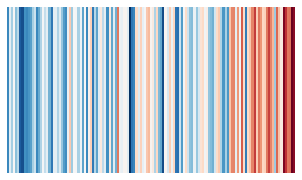

In [17]:
show_warming_stripes(list(reduced_data.values()))